In [1]:
import numpy as np
from pandas import read_csv
import glob
import os
from numpy import fft
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\frxas.py')

import frxas
from frxas import time_domain
%reload_ext autoreload
%autoreload 2

In [5]:
direc = r'D:\UW Research\fr-XAS July 2018\Data\10% O2\1 Hz 150 mV'
point = r'\P1'
amp = ''
file = r'\R3'

all_files = glob.glob(os.path.join(direc + point + file + '*[0-9][0-9][0-9].txt'))

In [6]:
%%time
dat = np.genfromtxt(all_files[0], delimiter='\t')
head = dat[0, :]

dat = dat[1:,:]
t = dat[:, 0]
for i,_ in enumerate(all_files[1:]):
    dum = np.genfromtxt(all_files[i], delimiter='\t', skip_header=1)
    dat = np.append(dat, dum, axis=0)
    
    t = np.append(t, t[-1] + t[1])
    t = np.append(t, t[-1] + dum[1:,0])

KeyboardInterrupt: 

In [190]:
a = read_csv(all_files[0], delimiter='\t', header=None, skiprows=1)

In [192]:
duma = np.array(a)

(40, 60)

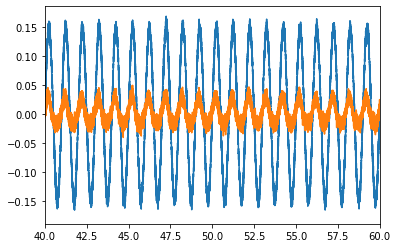

In [163]:
_, ax = plt.subplots()


ax.plot(t,dat[:,4])
ax.plot(t,dat[:,3])
ax.set_xlim(40, 60)

In [159]:
V, i = time_domain.phase_align(t, dat[:,4], dat[:,3], head[2], phase=-90)

Before Angle1:  -89.85640234403185  Angle2:  -68.01461273019716
Angle adj:  -0.14359765596816007
After Angle1:  -90.0  Angle2:  -68.15821038616531


c:\users\shadd\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\shadd\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(40, 60)

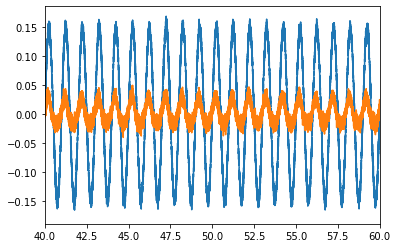

In [162]:
_, ax = plt.subplots()

ax.plot(t, V)
ax.plot(t, i)
ax.set_xlim(40,60)

In [62]:
2400*300

720000

In [91]:
type(all_files)

list

In [8]:
def extract_data(direc, point, amplitude, file, start=1, end=None, Irr=100, xray_raw=False):
    """
    """

    all_files = glob.glob(os.path.join(direc + point + amp + file +
                                       ' [0-9][0-9][0-9].txt'))
    try:
        data = np.array(read_csv(all_files[0], delimiter='\t', header=None, 
                                 skiprows=1))
    except IndexError:
        print("Could not open data files, check path specification.")
        raise

    t = data[:, 0]

    for file in all_files[start:end]:
        dum = np.array(read_csv(file, delimiter='\t', header=None,
                                skiprows=1))
        data = np.append(data, dum, axis=0)

        # Avoid repeating time point where t=0 at the beginning of each file
        t = np.append(t, t[-1] + t[1])
        t = np.append(t, t[-1] + dum[1:,0])

    V = time_domain.sub_mean(data[:, 4])
    J = time_domain.sub_mean(data[:, 3]) / Irr
    Ir = data[:, 2] / data[:, 1]
    Ir_avg = Ir.mean()
    Ir = time_domain.sub_mean(Ir)/ Ir_avg
#     Ir = Ir/Ir.mean()
    if xray_raw:
        Io = data[:, 1]
        If = data[:, 2]
        return t, V, J, Ir, Io, If
    else:
        return t, V, J, Ir

def get_freq(direc, point, amplitude, file):
    """
    """
    all_files = glob.glob(os.path.join(direc + point + amp + file +
                                   ' [0-9][0-9][0-9].txt'))
    head = np.genfromtxt(all_files[0], delimiter='\t', max_rows=1)
    return head[2]

In [9]:
%%time
direc = r'D:\UW Research\fr-XAS July 2018\Data\10% O2\1 Hz 150 mV'
point = r'\P1'
amp = ''
file = r'\R3'

t, V, J, Ir = extract_data(direc, point, amp, file, end=50)

Wall time: 592 ms


In [216]:
np.max(V[:2400])

0.1712824291909028

In [217]:
np.max(Eta[:2400])

0.15203053918544918

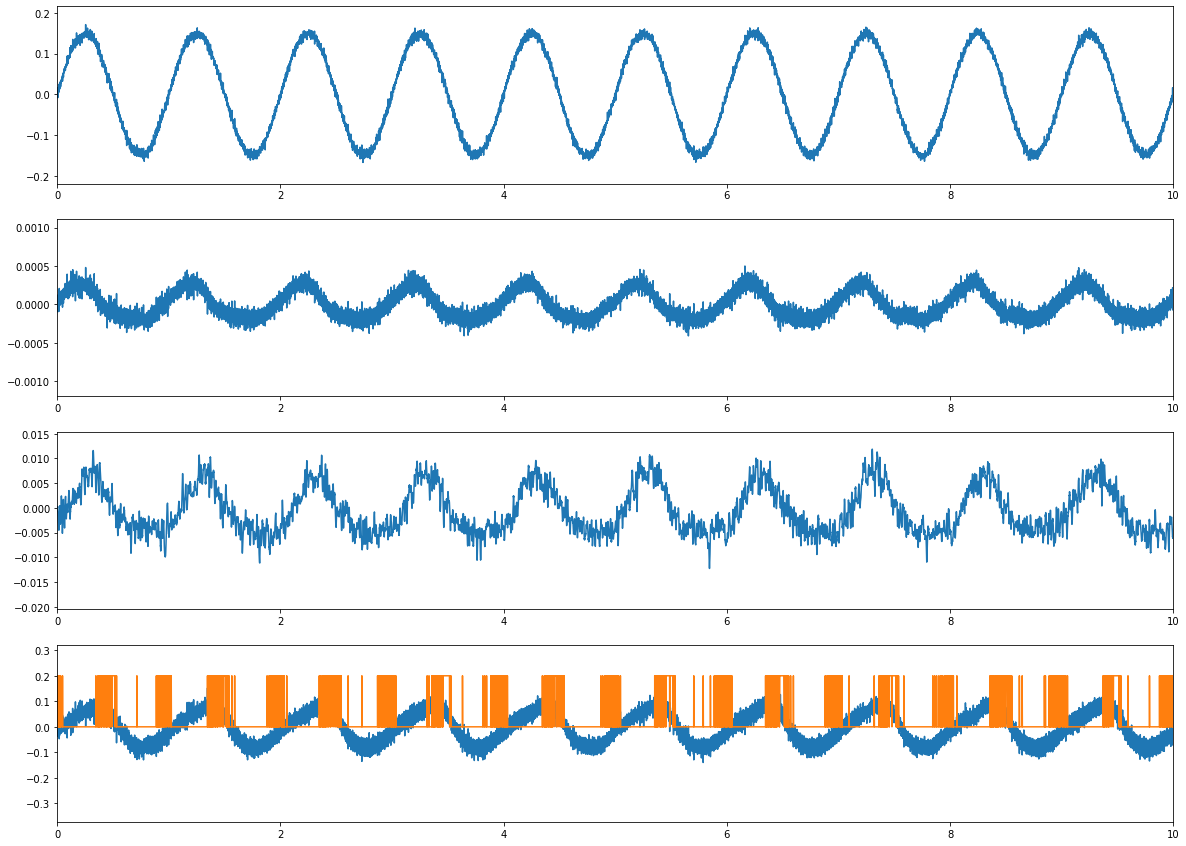

In [10]:
Eta = V - J * 349.5
dum = np.asarray(np.abs(Eta)>np.abs(V))/5
_, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(20,15))

st_ti=0
end_ti=10

ax1.plot(t, V)
ax2.plot(t, J)
ax3.plot(t, Ir)
ax4.plot(t, Eta)
ax4.plot(t, dum)

ax1.set_xlim(st_ti, end_ti)
ax2.set_xlim(st_ti, end_ti)
ax3.set_xlim(st_ti, end_ti)
ax4.set_xlim(st_ti, end_ti)

plt.show()

In [144]:
f = get_freq(direc, point, amp, file)

In [238]:
J_adj = time_domain.phase_align(t, V, J, f, phase=0)
Ir_adj = time_domain.phase_align(t, V, Ir, f, phase=0)
Eta_adj = time_domain.phase_align(t, V, Eta, f, phase=0)
V_adj = time_domain.phase_align(t, V, V, f, phase=0)

Before Angle1:  -89.03004128145582  Angle2:  -67.48421283832742
Angle adj:  89.03004128145582
After Angle1:  0.0  Angle2:  21.545828443128404
Before Angle1:  -89.03004128145582  Angle2:  -111.03291923906572
Angle adj:  89.03004128145582
After Angle1:  0.0  Angle2:  -22.002877957609897
Before Angle1:  -89.03004128145582  Angle2:  -111.04632832795336
Angle adj:  89.03004128145582
After Angle1:  0.0  Angle2:  -22.016287046497524
Before Angle1:  -89.03004128145582  Angle2:  -89.03004128145582
Angle adj:  89.03004128145582
After Angle1:  0.0  Angle2:  0.0


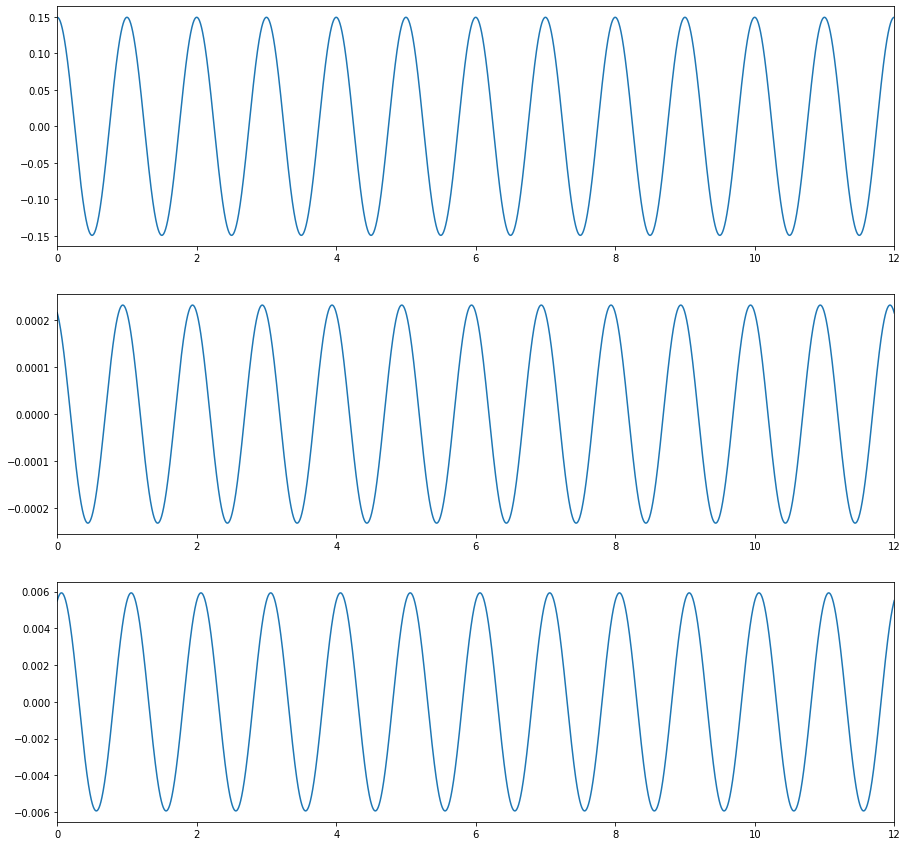

In [239]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,15))

st_ti=00
end_ti=12

ax1.plot(t, V_adj.real)
ax2.plot(t, J_adj.real)
ax3.plot(t, Ir_adj.real)

ax1.set_xlim(st_ti, end_ti)
ax2.set_xlim(st_ti, end_ti)
ax3.set_xlim(st_ti, end_ti)

plt.show()

In [168]:
Ns = t.size
freqs = fft.fftshift(fft.fftfreq(Ns, d=t[1]))
bins = time_domain.freq_bin(f, freqs, 1)

V_fft = fft.fftshift(fft.fft(V)/(Ns/2))
J_fft = fft.fftshift(fft.fft(J)/(Ns/2))
Ir_fft = fft.fftshift(fft.fft(Ir)/(Ns/2))
Eta_fft = fft.fftshift(fft.fft(Eta)/(Ns/2))

In [169]:
V_fft_adj = fft.fftshift(fft.fft(V_adj)/(Ns/2))
J_fft_adj = fft.fftshift(fft.fft(J_adj)/(Ns/2))
Ir_fft_adj = fft.fftshift(fft.fft(Ir_adj)/(Ns/2))
Eta_fft_adj = fft.fftshift(fft.fft(Eta_adj)/(Ns/2))

In [170]:
print('V: ', V_fft[bins[0,1]], V_fft_adj[bins[0,1]])
print('J: ', J_fft[bins[0,1]], J_fft_adj[bins[0,1]])
print('Ir: ', Ir_fft[bins[0,1]], Ir_fft_adj[bins[0,1]])
print('Eta: ', Eta_fft[bins[0,1]], Eta_fft_adj[bins[0,1]])
print('Z: ', V_fft[bins[0,1]]/J_fft[bins[0,1]], V_fft_adj[bins[0,1]]/J_fft_adj[bins[0,1]])

V:  (0.002528624364537259-0.14935240096544738j) (0.14937380498374106+7.52607852582009e-18j)
J:  (8.902843612475121e-05-0.00021476626309230765j) (0.00021624257690597536+8.538008043165889e-05j)
Ir:  (-0.0021277936071093717-0.005533586929743599j) (0.005496774372454082-0.0022211621826910203j)
Eta:  (-0.0016735178205509991-0.13921543334749048j) (0.13916715535377905-0.004029939796374304j)
Z:  (597.6061397187768-235.9556614876448j) (597.6061397187768-235.9556614876449j)


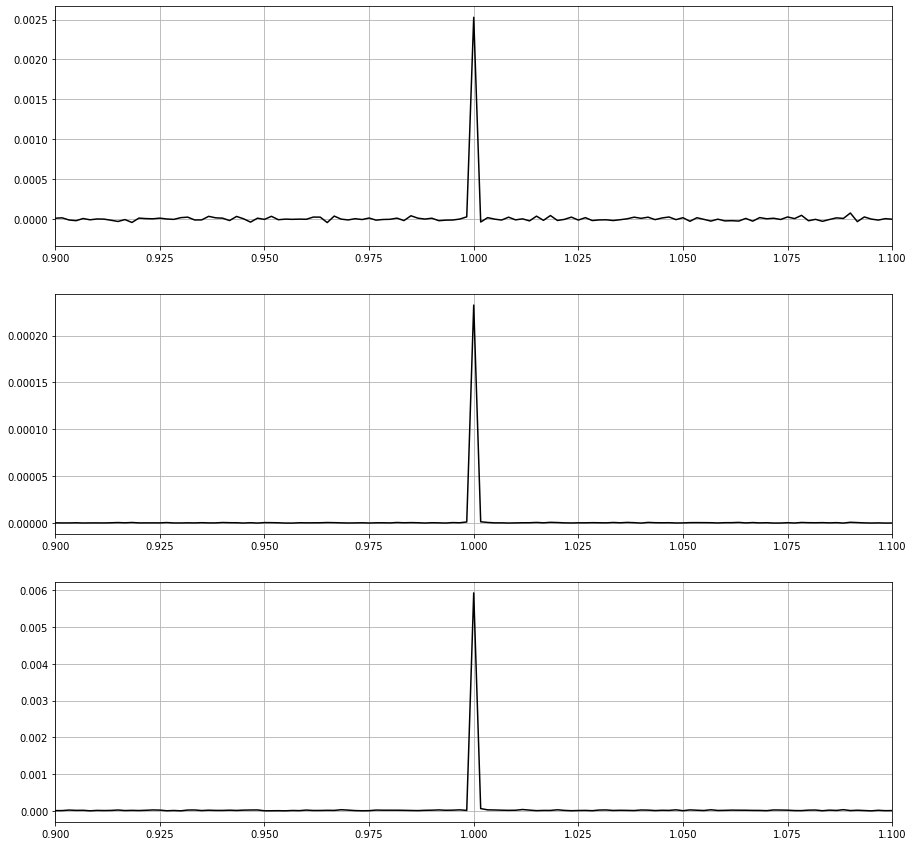

In [219]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,15))

st_f=.9
end_f=1.1

ax1.plot(freqs, V_fft.real, 'k')
# ax1.plot(freqs, V_fft.imag, 'c')

ax2.plot(freqs, np.abs(J_fft), 'k')
# ax2.plot(freqs, J_fft.imag, 'c')

ax3.plot(freqs, np.abs(Ir_fft), 'k')
# ax3.plot(freqs, Ir_fft.imag, 'c')


ax1.set_xlim(st_f, end_f)
ax2.set_xlim(st_f, end_f)
ax3.set_xlim(st_f, end_f)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

plt.show()

In [ ]:
class signal:
    def __init__(self, Ns, dt, td_data=None, td_data_adj=None, fft=None, fft_adj=None):
        if td_data is not None:
            self.td_data_ = td_data
        if td_data_adj is not None:
            self.td_data_adj_ = td_data_adj
        if fft is not None:
            self.fft_ = fft
        if fft_adj is not None:
            self.fft_adj_ = fft_adj
    
    
            